In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('BostonHousing.csv')
print("First 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())

First 5 rows:
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   no

### 📘 Boston Housing Dataset - Column Descriptions

- crim : Per capita crime rate by town  
- zn : Proportion of residential land zoned for lots over 25,000 sq. ft.  
- indus : Proportion of non-retail business acres per town  
- chas : Charles River dummy variable (1 if tract bounds river; 0 otherwise)  
- nox : Nitric oxides concentration (parts per 10 million)  
- rm : Average number of rooms per dwelling  
- age : Proportion of owner-occupied units built before 1940  
- dis : Weighted distances to five Boston employment centers  
- rad : Index of accessibility to radial highways  
- tax : Full-value property tax rate per $10,000  


### 📘 Boston Housing Dataset - Column Descriptions

- ptratio : Pupil-teacher ratio by town  
- b : Proportion of Black residents by town  
- lstat : Percentage of lower status of the population  
- medv : Median value of owner-occupied homes in $1000s (target variable)  


In [3]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


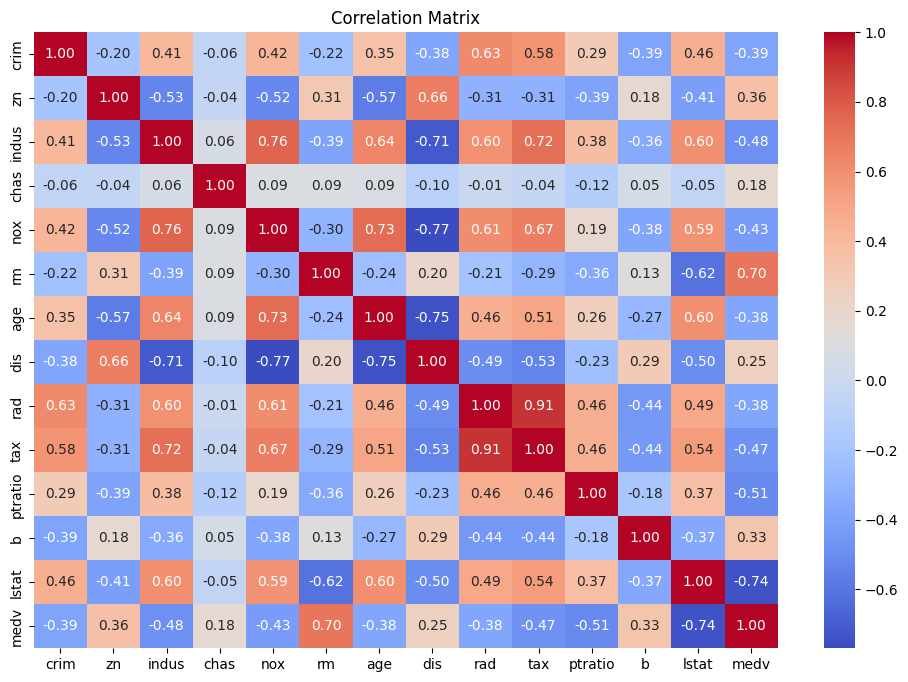

In [4]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [24]:
df['PRICE']=df['medv']

In [25]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,36.2


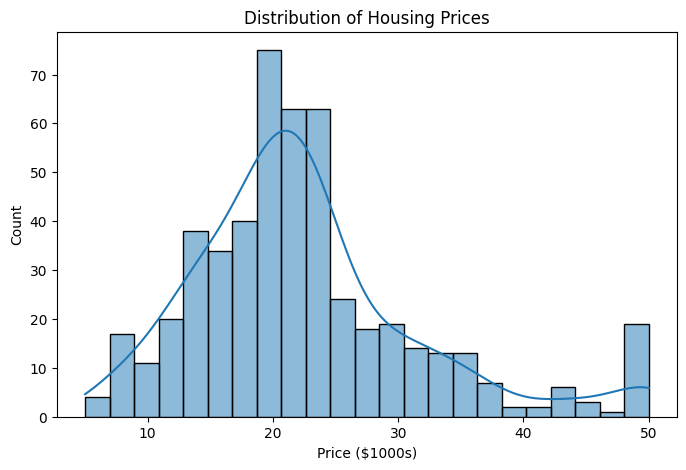

In [26]:
plt.figure(figsize=(8, 5))
sns.histplot(df['PRICE'], kde=True)
plt.title("Distribution of Housing Prices")
plt.xlabel("Price ($1000s)")
plt.show()

In [27]:
print(df.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
PRICE      0
dtype: int64


In [28]:
df = df.dropna()  #

In [29]:
df.fillna(df.mean(), inplace=True)  # Fill with mean (for numerical columns)

In [30]:
X = df.drop('PRICE', axis=1)  # Features
y = df['PRICE']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set: {X_train.shape}, Test set: {X_test.shape}")


Training set: (404, 14), Test set: (102, 14)


In [31]:
print(df.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
PRICE      0
dtype: int64


In [36]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = model.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Model Performance:
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00
R-squared (R²): 1.00


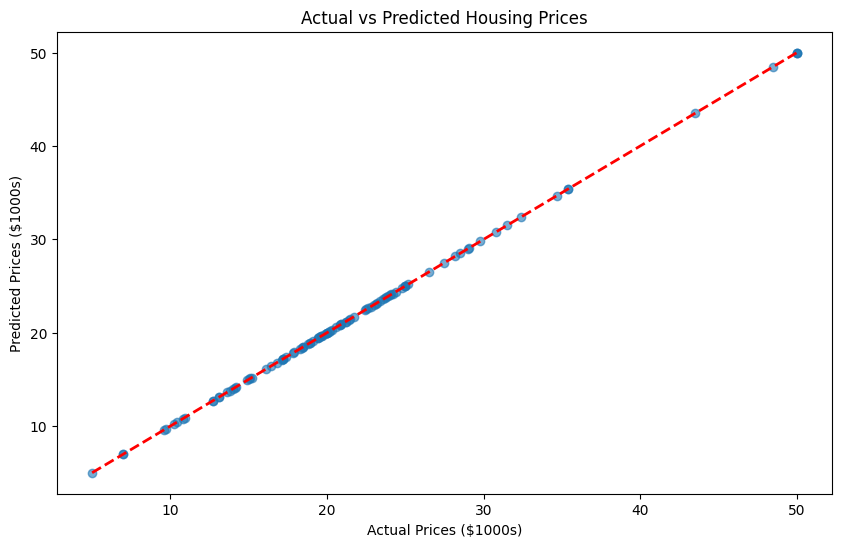

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices ($1000s)")
plt.ylabel("Predicted Prices ($1000s)")
plt.title("Actual vs Predicted Housing Prices")
plt.show()